In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, os, sys, seaborn as sns
os.chdir('E:\Machine Learning Course\Course3\data')

In [2]:
from colorsetup import colors, palette
sns.set_palette(palette)

In [3]:
df = pd.read_pickle('E:\Machine Learning Course\Course3\data\churndata.pkl')
df.head()

,id,months,offer,phone,multiple,internet_type,gb_mon,security,backup,protection,...,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
0,8779-QRDMV,1,None,No,No,DSL,8,No,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,1,91,5433
1,7495-OOKFY,8,Offer E,Yes,Yes,Fiber Optic,17,No,Yes,No,...,Yes,Month-to-Month,Yes,Credit Card,80.65,1024.10,3,1,69,5302
2,1658-BYGOY,18,Offer D,Yes,Yes,Fiber Optic,52,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1910.88,2,1,81,3179
3,4598-XLKNJ,25,Offer C,Yes,No,Fiber Optic,12,No,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2995.07,2,1,88,5337
4,4846-WHAFZ,37,Offer C,Yes,Yes,Fiber Optic,14,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,3102.36,2,1,67,2793


In [4]:
df.shape

(7043, 21)

In [5]:
df.drop(columns=['id','phone','total_revenue','cltv','churn_score'],inplace=True);

In [6]:
round(df.describe(),2)

,months,gb_mon,monthly,satisfaction,churn_value
count,7043.00,7043.00,7043.00,7043.00,7043.00
mean,32.39,20.52,64.76,3.24,0.27
std,24.54,20.42,30.09,1.20,0.44
min,1.00,0.00,18.25,1.00,0.00
25%,9.00,3.00,35.50,3.00,0.00
50%,29.00,17.00,70.35,3.00,0.00
75%,55.00,27.00,89.85,4.00,1.00
max,72.00,85.00,118.75,5.00,1.00


In [7]:
df.describe(include='object')

,offer,multiple,internet_type,security,backup,protection,support,unlimited,contract,paperless,payment
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,6,2,4,2,2,2,2,2,3,2,3
top,None,No,Fiber Optic,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
freq,3877,4072,3035,5024,4614,4621,4999,4745,3610,4171,3909


In [8]:
df_nunique = df.nunique()
df_nunique

months             72
offer               6
multiple            2
internet_type       4
gb_mon             50
security            2
backup              2
protection          2
support             2
unlimited           2
contract            3
paperless           2
payment             3
monthly          1585
satisfaction        5
churn_value         2
dtype: int64

In [9]:
binary_variables = list(df_nunique[df_nunique==2].index)
binary_variables

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value']

In [10]:
categorical_variables = list(df_nunique[(df_nunique>2) & (df_nunique<=6)].index)
categorical_variables

['offer', 'internet_type', 'contract', 'payment', 'satisfaction']

In [11]:
ordinal_variables = ['contract','satisfaction']

In [12]:
df['months'].unique()

array([ 1,  8, 18, 25, 37, 27, 58, 15,  7, 11,  3, 13, 16, 24,  4, 32, 54,
        2, 21, 55,  5, 20, 65, 49, 43, 56, 52, 33, 30, 46,  9, 10, 35, 44,
       62, 14, 12, 17, 39, 68, 34, 22, 19, 23, 42, 41, 57, 38, 29, 66, 69,
       40, 31, 59, 36, 45, 53, 70, 47, 50, 51, 72, 26,  6, 28, 48, 61, 71,
       60, 64, 67, 63], dtype=int64)

In [13]:
ordinal_variables.append('months')

In [14]:
ordinal_variables

['contract', 'satisfaction', 'months']

In [15]:
numeric_variables = list(set(df.columns)-set(binary_variables)-set(categorical_variables)-set(ordinal_variables))

array([[<AxesSubplot:title={'center':'monthly'}>,
        <AxesSubplot:title={'center':'gb_mon'}>]], dtype=object)

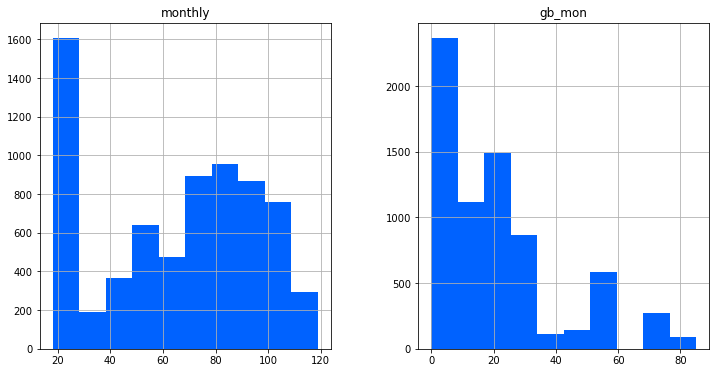

In [16]:
df[numeric_variables].hist(color=colors[0],figsize=(12,6))

In [17]:
df['months'] = pd.cut(df['months'],bins=5)

In [18]:
df.months

0       (0.929, 15.2]
1       (0.929, 15.2]
2        (15.2, 29.4]
3        (15.2, 29.4]
4        (29.4, 43.6]
            ...      
7038     (57.8, 72.0]
7039     (15.2, 29.4]
7040     (57.8, 72.0]
7041    (0.929, 15.2]
7042     (57.8, 72.0]
Name: months, Length: 7043, dtype: category
Categories (5, interval[float64]): [(0.929, 15.2] < (15.2, 29.4] < (29.4, 43.6] < (43.6, 57.8] < (57.8, 72.0]]

In [19]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [20]:
lb, le = LabelBinarizer(), LabelEncoder()

In [21]:
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

In [22]:
df[ordinal_variables].astype('category').describe()

,contract,satisfaction,months
count,7043,7043,7043
unique,3,5,5
top,0,2,0
freq,3610,2665,2470


In [23]:
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [24]:
categorical_variables = list(set(categorical_variables)-set(ordinal_variables)-set(binary_variables))

In [25]:
df = pd.get_dummies(df,columns=categorical_variables,drop_first=True)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,1.734204,1.592924,0.00,0.0,1.00,3.00,4.00
multiple,7043.0,0.421837,0.493888,0.00,0.0,0.00,1.00,1.00
gb_mon,7043.0,20.515405,20.418940,0.00,3.0,17.00,27.00,85.00
security,7043.0,0.286668,0.452237,0.00,0.0,0.00,1.00,1.00
backup,7043.0,0.344881,0.475363,0.00,0.0,0.00,1.00,1.00
protection,7043.0,0.343888,0.475038,0.00,0.0,0.00,1.00,1.00
support,7043.0,0.290217,0.453895,0.00,0.0,0.00,1.00,1.00
unlimited,7043.0,0.673719,0.468885,0.00,0.0,1.00,1.00,1.00
contract,7043.0,0.754792,0.848468,0.00,0.0,0.00,2.00,2.00
paperless,7043.0,0.592219,0.491457,0.00,0.0,1.00,1.00,1.00


In [27]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [28]:
for column in [ordinal_variables+numeric_variables]:
    df[column] = mm.fit_transform(df[column])

In [29]:
round(df.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.434,0.398,0.0,0.000,0.250,0.750,1.0
multiple,7043.0,0.422,0.494,0.0,0.000,0.000,1.000,1.0
gb_mon,7043.0,0.241,0.240,0.0,0.035,0.200,0.318,1.0
security,7043.0,0.287,0.452,0.0,0.000,0.000,1.000,1.0
backup,7043.0,0.345,0.475,0.0,0.000,0.000,1.000,1.0
protection,7043.0,0.344,0.475,0.0,0.000,0.000,1.000,1.0
support,7043.0,0.290,0.454,0.0,0.000,0.000,1.000,1.0
unlimited,7043.0,0.674,0.469,0.0,0.000,1.000,1.000,1.0
contract,7043.0,0.377,0.424,0.0,0.000,0.000,1.000,1.0
paperless,7043.0,0.592,0.491,0.0,0.000,1.000,1.000,1.0


In [30]:
outputfile = 'E:\Machine Learning Course\Course3\churndata_processed.csv'
df.to_csv(outputfile,index=False)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [32]:
y,X = df['churn_value'],df.drop(columns='churn_value')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)

In [34]:
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy score',round(accuracy_score(y_test,y_pred),2))
print('F1 score',round(f1_score(y_test,y_pred),2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2048
           1       0.77      0.72      0.74       770

    accuracy                           0.86      2818
   macro avg       0.83      0.82      0.82      2818
weighted avg       0.86      0.86      0.86      2818

Accuracy score 0.86
F1 score 0.74


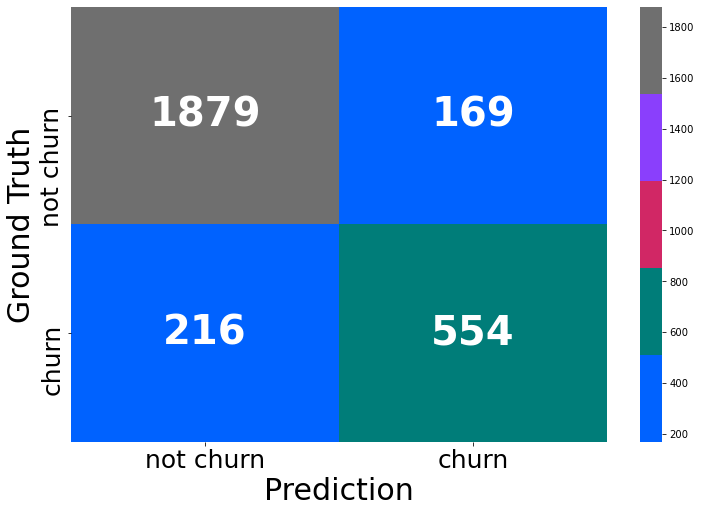

In [35]:
sns.set_palette(sns.set_palette(colors))
_,ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap=colors,annot_kws={"size":40,"weight":"bold"})
labels = ['not churn','churn']
ax.set_xticklabels(labels,fontsize=25);
ax.set_yticklabels(labels,fontsize=25);
ax.set_xlabel('Prediction',fontsize=30);
ax.set_ylabel('Ground Truth',fontsize=30);

In [36]:
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy score',round(accuracy_score(y_test,y_pred),2))
print('F1 score',round(f1_score(y_test,y_pred),2))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2048
           1       0.78      0.74      0.76       770

    accuracy                           0.87      2818
   macro avg       0.84      0.83      0.84      2818
weighted avg       0.87      0.87      0.87      2818

Accuracy score 0.87
F1 score 0.76


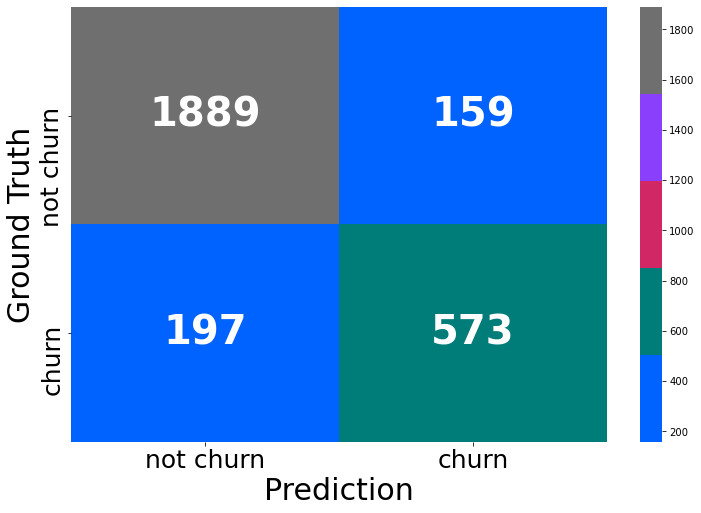

In [37]:
sns.set_palette(sns.set_palette(colors))
_,ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap=colors,annot_kws={"size":40,"weight":"bold"})
labels = ['not churn','churn']
ax.set_xticklabels(labels,fontsize=25);
ax.set_yticklabels(labels,fontsize=25);
ax.set_xlabel('Prediction',fontsize=30);
ax.set_ylabel('Ground Truth',fontsize=30);

In [39]:
max_k = 40
f1_scores = list()
error_rates = list()
for k in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn = knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    f1_scores.append((k,round(f1_score(y_test,y_pred),4)))
    error = 1-round(accuracy_score(y_test,y_pred),4)
    error_rates.append((k,error))

f1_results = pd.DataFrame(f1_scores,columns=['K','f1 score'])
error_results = pd.DataFrame(error_rates,columns=['K','Error Rates'])

<Figure size 1800x1200 with 0 Axes>

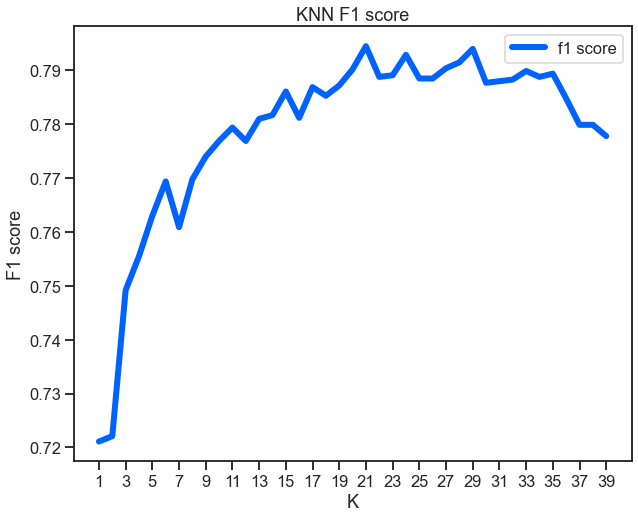

In [43]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(color=colors[0],figsize=(10,8),linewidth=6)
ax.set(xlabel='K',ylabel='F1 score')
ax.set_xticks(range(1,max_k,2));
plt.title('KNN F1 score');
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

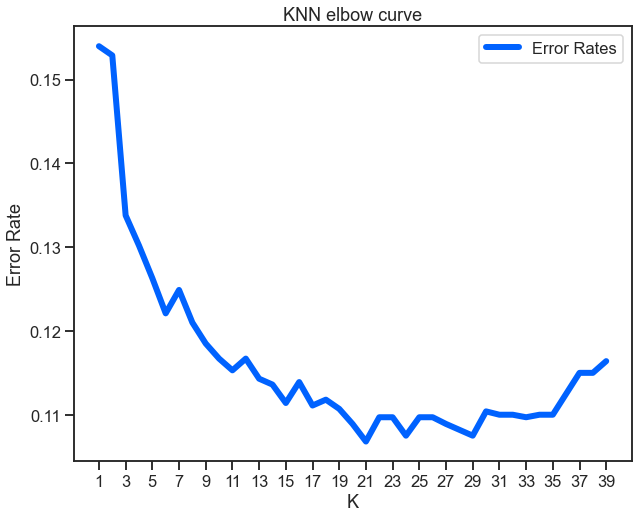

In [42]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(color=colors[0],figsize=(10,8),linewidth=6)
ax.set(xlabel='K',ylabel='Error Rate')
ax.set_xticks(range(1,max_k,2));
plt.title('KNN elbow curve');
plt.savefig('knn_elbow.png')